In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
df1 = pd.read_csv("/content/drive/MyDrive/CSV files/final_all_dataset.csv")

In [23]:
df1

,Time,Speed,Label
0,0.020005,0.000030,0
1,0.040010,0.120060,0
2,0.060015,0.240090,0
3,0.080020,0.360120,0
4,0.100025,0.480150,0
...,...,...,...
287923,79.919980,9.919278,0
287924,79.939985,9.920927,0
287925,79.959990,9.922542,0
287926,79.979995,9.924124,0


# ***Preparing the data***

In [24]:
import numpy as np

y = df1['Label']
df1 = df1.drop("Label", axis=1)
X = np.asarray(df1)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# ***Making the models***

# ***Bidirectional GRU with Multi-head attention***

In [5]:
!pip install keras_multi_head

  Created wheel for keras-multi-head: filename=keras_multi_head-0.29.0-py3-none-any.whl size=14993 sha256=87afd8b64a331793d404a286ce6f9f3b6db3f92a323ab12fc56be160733c01d9
  Stored in directory: /root/.cache/pip/wheels/86/aa/3c/9d15d24005179dae08ff291ce99c754b296347817d076fd9fb
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18912 sha256=d6df8f886ba4ed8caeda29db5fcceb42931ee36bebb4300bcdb71bded3c146f0
  Stored in directory: /root/.cache/pip/wheels/95/b1/a8/5ee00cc137940b2f6fa198212e8f45d813d0e0d9c3a04035a3
Successfully built keras-multi-head keras-self-attention


In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, GRU, Bidirectional, Input, GlobalMaxPool2D, SimpleRNN, BatchNormalization

from keras_multi_head import MultiHead

def get_bigrumh(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(MultiHead(Bidirectional(GRU(units=64, return_sequences=True, activation='relu'))))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool2D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [93]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn import metrics
# importing the module
import tracemalloc
from sklearn.metrics import classification_report
start = time()
lr=0.001
opt=tf.keras.optimizers.Adam(lr)
model1 = get_bigrumh(2,opt)
# starting the monitoring
tracemalloc.start()
history = model1.fit(X_train,y1,epochs = 10, batch_size=4096,validation_data=(X_val, y_val1))
yp =model1.predict(X_test)


Epoch 1/10
48/48 [==============================] - 79s 935ms/step - loss: 1.4071 - acc: 0.5240 - val_loss: 1.3025 - val_acc: 0.5387
Epoch 2/10
48/48 [==============================] - 44s 920ms/step - loss: 1.2530 - acc: 0.5297 - val_loss: 1.2721 - val_acc: 0.5381
Epoch 3/10
48/48 [==============================] - 44s 921ms/step - loss: 1.1498 - acc: 0.5304 - val_loss: 1.2314 - val_acc: 0.5387
Epoch 4/10
48/48 [==============================] - 44s 921ms/step - loss: 1.1069 - acc: 0.5322 - val_loss: 1.1996 - val_acc: 0.5392
Epoch 5/10
48/48 [==============================] - 44s 923ms/step - loss: 1.0824 - acc: 0.5375 - val_loss: 1.1955 - val_acc: 0.5401
Epoch 6/10
48/48 [==============================] - 44s 923ms/step - loss: 1.0587 - acc: 0.5454 - val_loss: 1.2163 - val_acc: 0.5412
Epoch 7/10
48/48 [==============================] - 44s 920ms/step - loss: 1.0460 - acc: 0.5546 - val_loss: 1.2620 - val_acc: 0.5412
Epoch 8/10
48/48 [==============================] - 44s 921ms/step - 

550.0729668140411


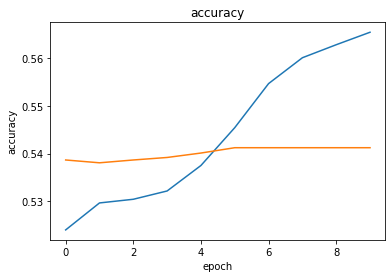

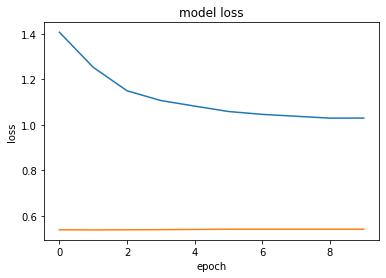

the model is bigru plus multihead attention
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f0af9befa90>
the confusion matrix is [[25561     0     0     0]
 [ 8407     0     0     0]
 [ 6548     0     0     0]
 [ 6993     0     0     0]]


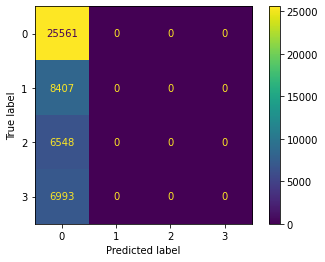

the accuracy for test is is 0.5380243743290745
              precision    recall  f1-score   support

     class 0       0.54      1.00      0.70     25561
     class 1       0.00      0.00      0.00      8407
     class 2       0.00      0.00      0.00      6548
     class 3       0.00      0.00      0.00      6993

    accuracy                           0.54     47509
   macro avg       0.13      0.25      0.17     47509
weighted avg       0.29      0.54      0.38     47509

(15994857, 17306622)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_acc'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
  
  
print("the model is bigru plus multihead attention")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Simple RNN***


In [35]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_rnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(SimpleRNN(units=64, return_sequences=True, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model



In [86]:
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn import metrics
# importing the module
import tracemalloc

start = time()
lr=0.001
opt=tf.keras.optimizers.Adam(lr)
model1 = get_rnn(2,opt)
model1.summary()
# starting the monitoring
tracemalloc.start()
history = model1.fit(X_train,y1,epochs = 50, batch_size=1024,validation_data=(X_val,y_val1))


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 2, 64)             4224      
                                                                 
 batch_normalization_46 (Bat  (None, 2, 64)            256       
 chNormalization)                                                
                                                                 
 dense_60 (Dense)            (None, 2, 5)              325       
                                                                 
 batch_normalization_47 (Bat  (None, 2, 5)             20        
 chNormalization)                                                
                                                                 
 dense_61 (Dense)            (None, 2, 3)              18        
                                                                 
 batch_normalization_48 (Bat  (None, 2, 3)           

158.36194968223572


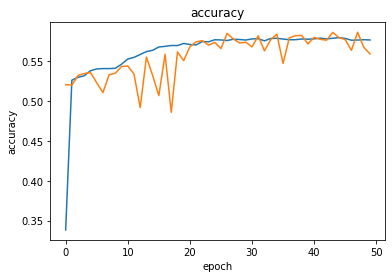

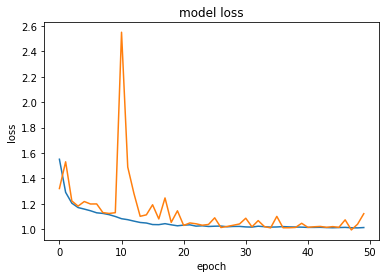

the model is rnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f0b064242d0>
the confusion matrix is [[23668   838  1055     0]
 [ 6075  1345   987     0]
 [ 4864   481  1203     0]
 [ 4953  1189   851     0]]


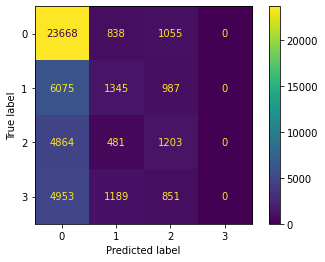

the accuracy for test is is 0.5518112357658549
              precision    recall  f1-score   support

     class 0       0.60      0.93      0.73     25561
     class 1       0.35      0.16      0.22      8407
     class 2       0.29      0.18      0.23      6548
     class 3       0.00      0.00      0.00      6993

    accuracy                           0.55     47509
   macro avg       0.31      0.32      0.29     47509
weighted avg       0.42      0.55      0.46     47509

(11714723, 13033759)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
yp =model1.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()
  
  
print("the model is rnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Autoencoder based classifier***

In [38]:
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from sklearn.cluster import SpectralClustering
from time import time
from keras import callbacks
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Input, Dropout
from keras.initializers import VarianceScaling
#from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
import tensorflow as tf

In [39]:
# Building the Input Layer
input_layer = Input(shape =(2, ))
  
# Building the Encoder network
encoded = Dense(4, activation ='relu')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(4, activation ='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(8, activation ='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(4, activation ='relu')(encoded)

  
# Building the Decoder network

decoded = Dense(4, activation ='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(8, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4, activation ='relu')(decoded)
  
# Building the Output Layer
output_layer = Dense(4, activation ='softmax')(decoded)

In [41]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adam", loss ="categorical_crossentropy",metrics='acc')
  
# Training the Auto-encoder network


In [88]:

lr=0.001
opt=tf.keras.optimizers.Adam(lr)
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
# starting the monitoring
tracemalloc.start()
history = autoencoder.fit(X_train,y1,epochs=50, batch_size=512,validation_data=(X_val,y_val1))


Epoch 1/50
377/377 [==============================] - 2s 5ms/step - loss: 0.8973 - acc: 0.6058 - val_loss: 0.8492 - val_acc: 0.6192
Epoch 2/50
377/377 [==============================] - 2s 5ms/step - loss: 0.8965 - acc: 0.6062 - val_loss: 0.8521 - val_acc: 0.6170
Epoch 3/50
377/377 [==============================] - 2s 5ms/step - loss: 0.8953 - acc: 0.6075 - val_loss: 0.8660 - val_acc: 0.6145
Epoch 4/50
377/377 [==============================] - 2s 5ms/step - loss: 0.8912 - acc: 0.6082 - val_loss: 0.8663 - val_acc: 0.6147
Epoch 5/50
377/377 [==============================] - 2s 5ms/step - loss: 0.8970 - acc: 0.6055 - val_loss: 0.8528 - val_acc: 0.6116
Epoch 6/50
377/377 [==============================] - 2s 5ms/step - loss: 0.8944 - acc: 0.6065 - val_loss: 0.8594 - val_acc: 0.6082
Epoch 7/50
377/377 [==============================] - 2s 5ms/step - loss: 0.8888 - acc: 0.6089 - val_loss: 0.8474 - val_acc: 0.6191
Epoch 8/50
377/377 [==============================] - 2s 5ms/step - loss: 0.

303.8610873222351


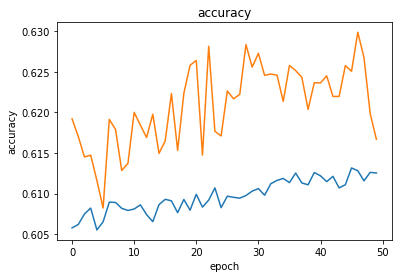

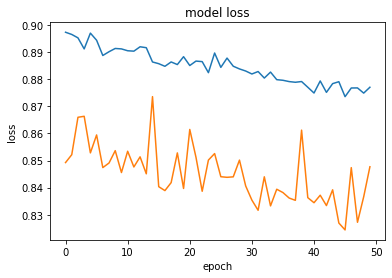

the model is autoencoders
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f0af9d33e10>
the confusion matrix is [[24194   446   377   544]
 [ 3912  2546   237  1712]
 [ 5587   109   847     5]
 [ 3244  2112   143  1494]]


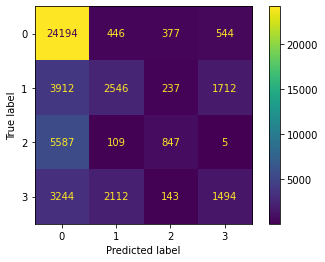

the accuracy for test is is 0.6121155991496348
              precision    recall  f1-score   support

     class 0       0.66      0.95      0.77     25561
     class 1       0.49      0.30      0.37      8407
     class 2       0.53      0.13      0.21      6548
     class 3       0.40      0.21      0.28      6993

    accuracy                           0.61     47509
   macro avg       0.52      0.40      0.41     47509
weighted avg       0.57      0.61      0.55     47509

(3687937, 4980795)


In [89]:
yp =autoencoder.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
  
  
print("the model is autoencoders")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Transformers based classifier***

In [43]:
from keras import layers
import keras
import tensorflow as tf
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads,
                                             key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)  # self-attention layer
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # layer norm
        ffn_output = self.ffn(out1)  #feed-forward layer
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # layer norm

In [44]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,
                                          output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [45]:
def transatt(input_length, opt):
  embed_dim = 40 # Embedding size for each token
  num_heads = 2  # Number of attention heads
  ff_dim = 3  # Hidden layer size in feed forward network inside transformer

  model = keras.Sequential()
  model.add(layers.Input(shape=(input_length, )))
  model.add(TokenAndPositionEmbedding(input_length, 1000000, embed_dim))
  model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
  model.add(layers.GlobalAveragePooling1D())
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(ff_dim, activation='relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [ ]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)
model1 = transatt(2,opt)
# starting the monitoring
tracemalloc.start()
history = model1.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))


2968.0189175605774


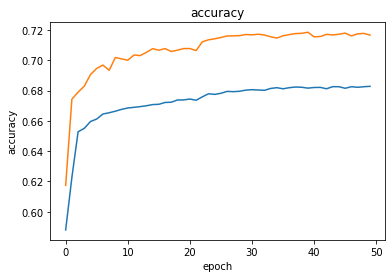

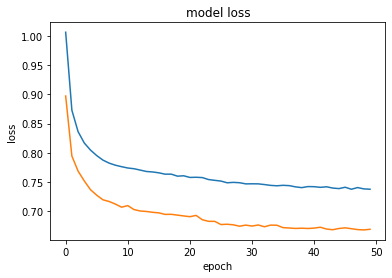

the model is transformers
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f0b074ee310>
the confusion matrix is [[24236   451   830    44]
 [ 1569  5043  1762    33]
 [ 2186    47  4315     0]
 [ 2147  3292  1119   435]]


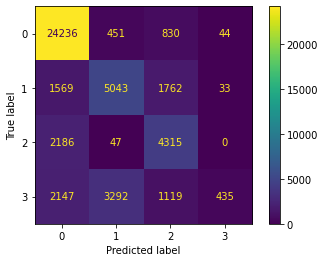

the accuracy for test is is 0.7162642867667179
              precision    recall  f1-score   support

     class 0       0.80      0.95      0.87     25561
     class 1       0.57      0.60      0.59      8407
     class 2       0.54      0.66      0.59      6548
     class 3       0.85      0.06      0.12      6993

    accuracy                           0.72     47509
   macro avg       0.69      0.57      0.54     47509
weighted avg       0.73      0.72      0.67     47509

(0, 0)


In [48]:
yp =model1.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
  
  
print("the model is transformers")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***GRU+Simple RNN***

In [53]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_grurnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(GRU(units=64, return_sequences=True, activation='relu'))
  model.add(SimpleRNN(units=64, return_sequences=True, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model


In [84]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)

# starting the monitoring
tracemalloc.start()
model = get_grurnn(2,opt)
history = model.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))


Epoch 1/50
95/95 [==============================] - 10s 58ms/step - loss: 1.4650 - acc: 0.3106 - val_loss: 1.2856 - val_acc: 0.5412
Epoch 2/50
95/95 [==============================] - 5s 54ms/step - loss: 1.2540 - acc: 0.4886 - val_loss: 1.2393 - val_acc: 0.5226
Epoch 3/50
95/95 [==============================] - 5s 55ms/step - loss: 1.1799 - acc: 0.5079 - val_loss: 1.2105 - val_acc: 0.5283
Epoch 4/50
95/95 [==============================] - 5s 55ms/step - loss: 1.1343 - acc: 0.5135 - val_loss: 1.1974 - val_acc: 0.5412
Epoch 5/50
95/95 [==============================] - 6s 60ms/step - loss: 1.1103 - acc: 0.5315 - val_loss: 1.1500 - val_acc: 0.5366
Epoch 6/50
95/95 [==============================] - 6s 61ms/step - loss: 1.0950 - acc: 0.5489 - val_loss: 4.5708 - val_acc: 0.5493
Epoch 7/50
95/95 [==============================] - 6s 59ms/step - loss: 1.0784 - acc: 0.5571 - val_loss: 1.2277 - val_acc: 0.5513
Epoch 8/50
95/95 [==============================] - 5s 53ms/step - loss: 1.0616 - 

7276.637880086899


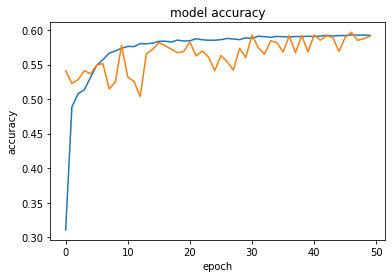

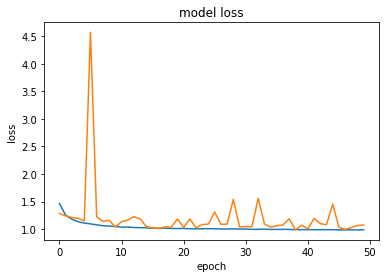

the model is gru+simplernn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f0b0b20c490>
the confusion matrix is [[25066   132   363     0]
 [ 5855  1711   841     0]
 [ 5069   277  1202     0]
 [ 5272  1059   662     0]]


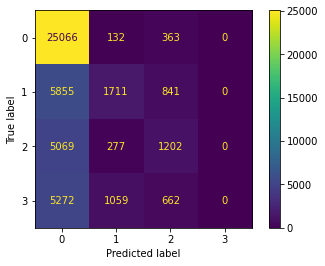

the accuracy is 0.5889199941063799
              precision    recall  f1-score   support

     class 0       0.61      0.98      0.75     25561
     class 1       0.54      0.20      0.30      8407
     class 2       0.39      0.18      0.25      6548
     class 3       0.00      0.00      0.00      6993

    accuracy                           0.59     47509
   macro avg       0.38      0.34      0.32     47509
weighted avg       0.48      0.59      0.49     47509

(16060121, 17350471)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
yp =model.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
  
  
print("the model is gru+simplernn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Bidirectional GRU +Bidirectional SimpleRNN***

In [57]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_bigrurnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(Bidirectional(GRU(units=64, return_sequences=True, activation='relu')))
  model.add(Bidirectional(SimpleRNN(units=64, return_sequences=True, activation='relu')))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [59]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)

# starting the monitoring
tracemalloc.start()
model = get_bigrurnn(2,opt)
history = model.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))


Epoch 1/50
95/95 [==============================] - 28s 164ms/step - loss: 1.2747 - acc: 0.4520 - val_loss: 1.2825 - val_acc: 0.5041
Epoch 2/50
95/95 [==============================] - 14s 143ms/step - loss: 1.1188 - acc: 0.5520 - val_loss: 1.3035 - val_acc: 0.3711
Epoch 3/50
95/95 [==============================] - 13s 142ms/step - loss: 1.0687 - acc: 0.5606 - val_loss: 1.4050 - val_acc: 0.2636
Epoch 4/50
95/95 [==============================] - 13s 140ms/step - loss: 1.0289 - acc: 0.5693 - val_loss: 1.3613 - val_acc: 0.3222
Epoch 5/50
95/95 [==============================] - 14s 143ms/step - loss: 0.9997 - acc: 0.5790 - val_loss: 1.1627 - val_acc: 0.4942
Epoch 6/50
95/95 [==============================] - 14s 145ms/step - loss: 0.9741 - acc: 0.5870 - val_loss: 1.0536 - val_acc: 0.5541
Epoch 7/50
95/95 [==============================] - 15s 157ms/step - loss: 0.9605 - acc: 0.5946 - val_loss: 1.0582 - val_acc: 0.5824
Epoch 8/50
95/95 [==============================] - 10s 102ms/step - 

4246.061302900314


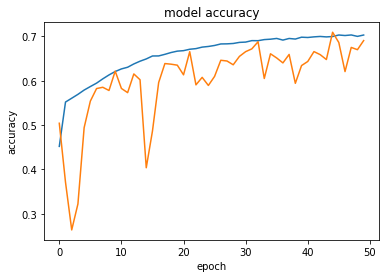

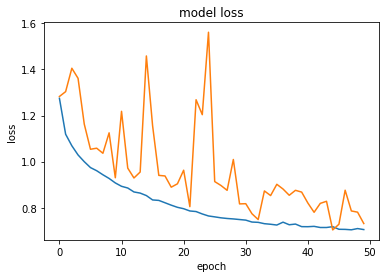

the model is bigru+birnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f0b06b21310>
the confusion matrix is [[22449  1589  1326   197]
 [ 1822  5839   561   185]
 [ 2159   305  4084     0]
 [ 1897  4456   331   309]]


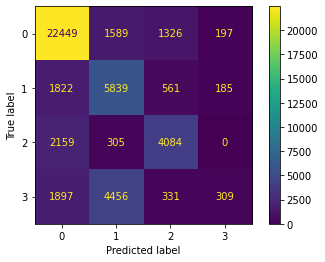

the accuracy is 0.6878907154433896
              precision    recall  f1-score   support

     class 0       0.79      0.88      0.83     25561
     class 1       0.48      0.69      0.57      8407
     class 2       0.65      0.62      0.64      6548
     class 3       0.45      0.04      0.08      6993

    accuracy                           0.69     47509
   macro avg       0.59      0.56      0.53     47509
weighted avg       0.67      0.69      0.65     47509

(37068785, 38349931)


In [60]:
yp =model.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
  
  
print("the model is bigru+birnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()